In [1]:
import torch
from torch import nn # nn stands for neural network and building blocks for creating neural networks in PyTorch
import matplotlib.pyplot as plt

print(torch.__version__)

2.9.1+cpu


# 1. Data Preparing and Loading

In [2]:
# create known parameters
weight=0.7
bias=0.3

# create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) # not compress, dim=1 means column wise
y=weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# 1.1 Split data into training and test sets

In [3]:
# Create train/test split
# In this case, there is no validation set
train_split=int(0.8*len(X)) # 80% for training, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
# visualize
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
      """
      Plots training data, test data and compares predictions.
      """
      plt.figure(figsize=(10,7))

      # plot training data in blue
      plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

      # plot test data in green
      plt.scatter(test_data, test_labels, c='g', s=4,label="Testing data")
      if predictions is not None:
            # plot the predictions in red (predictions were made on the test data
            plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
      # show the legend
      plt.legend(prop={'size': 14})


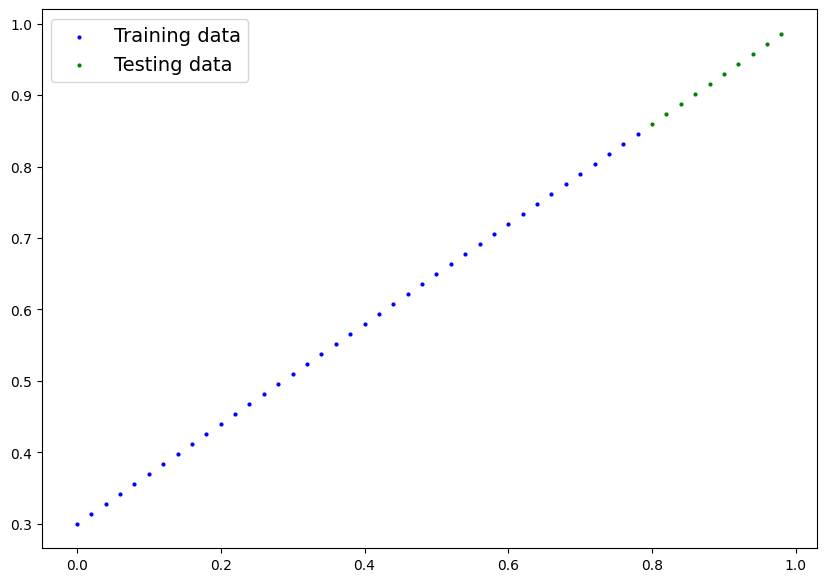

In [7]:
plot_predictions(X_train,y_train,X_test,y_test)

# 2. Build Model

In [29]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize model parameters
        self.weights=nn.Parameter(torch.randn(1,
                              dtype=torch.float),
                              requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),
                               requires_grad=True)
    # forward() defines the computation in the model
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights* X + self.bias


## 2.1 PyTorch model building essentials
PyTorch has four (give or take) essential modules we can use to create almost any kind of neural network.
- torch.nn
- torch.nn.Parameter
- torch.nn.Module
- torch.optim
- forward()
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

## 2.2 Checking the contents of a PyTorch model

In [30]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [31]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## 2.3 Making predictions using torch.inference_mode()

In [32]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [33]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


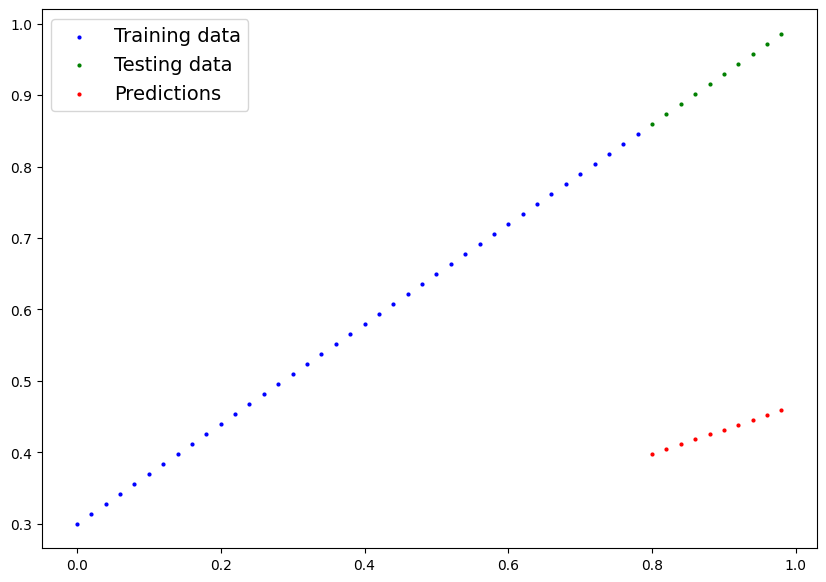

In [34]:

plot_predictions(predictions=y_preds)

# 3. Train Model